In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from geopy import distance

### Id: Unique identification number for the property
### date: the date the house was sold
### price: the price of the house
### waterfront: the house which has a view to a waterfront
### condition: How good the condition is (Overall). 1 indicates worn-out property and 5 excellent.
### grade: Overall grade given to the housing unit, based on the King County grading system. 1 poor, 13 excellent.
### Sqft_above: square footage of house apart from the basement
### Sqft_living15: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotSize area.
### Sqft_lot15: lotSize area in 2015(implies-- some renovations)

In [2]:
## Importing the data set
df=pd.read_excel("regression_data.xls")

In [3]:
## The raw data set
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,2015-01-16,3,2.50,1600,2388,2.0,0,0,3,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [4]:
## Shape of the data frame.
df.shape

(21597, 21)

In [5]:
## Assigning the feature "id" as the index
df=df.set_index("id")

In [6]:
## Insights on the Data Types of the Features.
df.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                     int64
dtype: object

In [7]:
## Checking for NA's
df.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   bedrooms       21597 non-null  int64         
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  int64         
 4   sqft_lot       21597 non-null  int64         
 5   floors         21597 non-null  float64       
 6   waterfront     21597 non-null  int64         
 7   view           21597 non-null  int64         
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   21597 non-null  int64         
 14  zipcode        21597 non-null  int64         
 15  lat  

In [9]:
## Statistical inference from the data frame
df.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [10]:
## Retrieving year data from the date feature. 
df['year']=df['date'].dt.year

In [11]:
## Creating copies for different tests.
df_1=df.copy()
df_2=df.copy()
df_3=df.copy()

In [12]:
## Retreiving features with discret data
for col in df.columns:
    if (df[col].dtypes=='int64'or 'float64')and df[col].nunique()<100:
        print(col,df[col].nunique())
        

bedrooms 12
bathrooms 29
floors 6
waterfront 2
view 5
condition 5
grade 11
yr_renovated 70
zipcode 70
year 2


In [13]:
## Insight onto the discret feature 
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [14]:
## Droping columns based on the EDA done on Tableau. Also removing zipcode as we are utilizing lat and long feature.
df=df.drop(columns=['sqft_lot','sqft_basement', 'sqft_living15','sqft_lot15', 'date', 'zipcode', 'condition'])

In [15]:
## Meauring the distance between the city center to each individual record.
location = tuple(map(tuple, df[['lat', 'long']].values))
# the distance of every house from downtowm seattle
seattle_dt = (47.6050, -122.3344)
df['distance'] = [distance.distance(seattle_dt, loc).km for loc in location]
df.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,yr_built,yr_renovated,lat,long,price,year,distance
id,,,,,,,,,,,,,,,
7129300520,3,1.00,1180,1.0,0,0,7,1180,1955,0,47.5112,-122.257,221900,2014,11.945427
6414100192,3,2.25,2570,2.0,0,0,7,2170,1951,1991,47.7210,-122.319,538000,2014,12.949082
5631500400,2,1.00,770,1.0,0,0,6,770,1933,0,47.7379,-122.233,180000,2015,16.623098
2487200875,4,3.00,1960,1.0,0,0,7,1050,1965,0,47.5208,-122.393,604000,2014,10.348172
1954400510,3,2.00,1680,1.0,0,0,8,1680,1987,0,47.6168,-122.045,510000,2015,21.797975


# Test 1- Model Trainning

In [16]:
## X-Y split
x=df.drop('price',axis=1)
y=df['price']

In [17]:
## Train test split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
## Creating a Linear Regression object
reg=LinearRegression()

In [19]:
## Training the Model
reg.fit(X_train, Y_train)

LinearRegression()

In [20]:
## Prediction
Y_pred = reg.predict(X_test)

In [21]:
# Calculate RMSE
rmse = mean_squared_error(Y_test, Y_pred, squared=False)
# Calculate MAE
mae = mean_absolute_error(Y_test, Y_pred)
# Calculate R2 score
score = r2_score(Y_test, Y_pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", score)

RMSE: 193320.5299441732
MAE: 120511.676385702
R2: 0.7129942026807367


# Test 2- Log Scaling

In [22]:
## Log scaling the target variable
Y_train_scal = np.log1p(Y_train)
Y_test_scal = np.log1p(Y_test)

In [23]:
## Training the Model
reg.fit(X_train, Y_train_scal)

LinearRegression()

In [24]:
# Calculate R2 score
reg.score(X_test, Y_test_scal)

0.7809419890346991

In [25]:
## Prediction
y_pred = reg.predict(X_test)

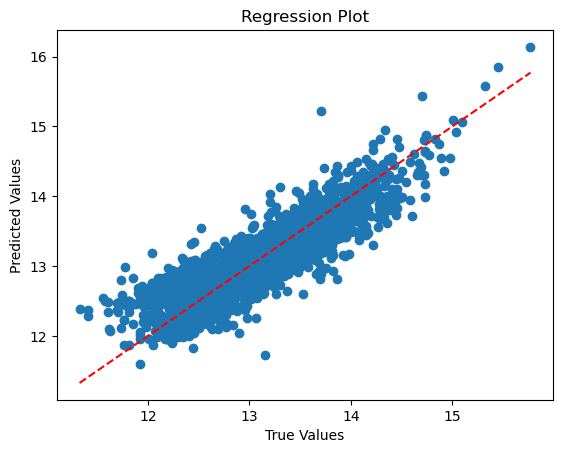

In [26]:
## Regression Plot
plt.scatter(Y_test_scal, y_pred)
plt.plot([np.min(Y_test_scal), np.max(Y_test_scal)], [np.min(Y_test_scal), np.max(Y_test_scal)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot')
plt.show()

## Test 3- DF_1, Zipcode as Categorical

In [27]:
## Data set
df_1

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,2014
6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,2015
1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,2014


In [28]:
## Utilizing Zipcode feature as a categorical.
df_1_categorical=df_1['zipcode'].astype('object')

In [29]:
## Encoding Categorical data
df_1_categorical=pd.get_dummies(df_1_categorical)

C:\Users\aci\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [30]:
## Concating numerical and Categorical data frame.
df_1_concat = pd.concat([df_1, df_1_categorical], axis=1)

In [31]:
## Droping columns based on the EDA done on Tableau. Also removing zipcode as we are utilizing lat and long feature.
df_1_concat=df_1_concat.drop(columns=['sqft_lot','sqft_basement', 'sqft_living15','sqft_lot15', 'date'])

In [32]:
## X-Y split
x=df_1_concat.drop('price',axis=1)
y=df_1_concat['price']

In [33]:
## Train test split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
## Log scaling the target variable
Y_train_scal = np.log1p(Y_train)
Y_test_scal = np.log1p(Y_test)

In [35]:
## Training the Model
reg.fit(X_train, Y_train_scal)

C:\Users\aci\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()

In [36]:
# Calculate R2 score
reg.score(X_test, Y_test_scal)

C:\Users\aci\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8719824735206029

## Test 4- DF_2 zipcode categorized and renovation_year bucketed

In [37]:
## Data set
df_2

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,2014
6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,2015
1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,2014


In [38]:
## Bucketing "yr_renovated" with cells having a data not equal to zero being converted to 1 and cells with data as 0 in them staying same. This creates a binary data 
def replace_nonzero(value):
    if value != 0:
        return 1
    else:
        return value

# Apply the function to each element in the Series
df_2['yr_renovated'] = df_2['yr_renovated'].apply(replace_nonzero)


In [39]:
## Droping columns based on the EDA done on Tableau. Also removing zipcode as we are utilizing lat and long feature.
df_2=df_2.drop(columns=['sqft_lot','sqft_basement', 'sqft_living15','sqft_lot15', 'date'])

In [40]:
## Dividing the data frame in categorical and numerical sets.
df_2_categorical =df_2[['yr_renovated','zipcode']]
df_2_numerical =df_2.drop(['yr_renovated','zipcode'], axis=1)

In [41]:
## Changing the data type of yr_renovated and zipcode from numerical to object 
df_2_categorical=df_2[['yr_renovated','zipcode']].astype('object')

In [42]:
## encoding categorical data frame.
df_2_categorical=pd.get_dummies(df_2_categorical)

C:\Users\aci\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [43]:
## Concating the numerical and categorical data frame in a single data frame.
df_2_concat = pd.concat([df_2_numerical, df_2_categorical], axis=1)

In [44]:
## X-Y split
x=df_2_concat.drop('price',axis=1)
y=df_2_concat['price']

In [45]:
## Train test split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [46]:
## Log scaling
Y_train_scal = np.log1p(Y_train)
Y_test_scal = np.log1p(Y_test)

In [47]:
## Training the Model
reg.fit(X_train, Y_train_scal)

LinearRegression()

In [48]:
# Calculate R2 score
reg.score(X_test, Y_test_scal)

0.8719792483186739

In [49]:
## Prediction value
y_pred = reg.predict(X_test)

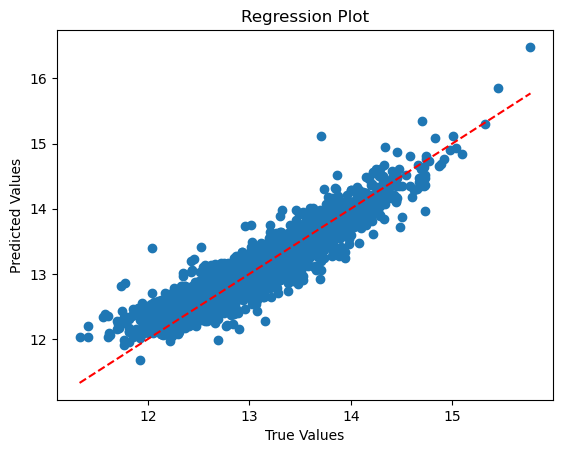

In [50]:
## Regression Plot
plt.scatter(Y_test_scal, y_pred)
plt.plot([np.min(Y_test_scal), np.max(Y_test_scal)], [np.min(Y_test_scal), np.max(Y_test_scal)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot')
plt.show()

## Test 4- DF_3 zipcode categorized, renovation_year bucketed and Year built bucking.

In [51]:
## Raw data
df_3

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,221900,2014
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000,2014
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,180000,2015
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,604000,2014
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,510000,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,...,0,2009,0,98103,47.6993,-122.346,1530,1509,360000,2014
6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,...,0,2014,0,98146,47.5107,-122.362,1830,7200,400000,2015
1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,...,0,2009,0,98144,47.5944,-122.299,1020,2007,402101,2014


In [52]:
## Similar to test-3 Bucketing "yr_renovated" with cells having a data not equal to zero being converted to 1 and cells with data as 0 in them staying same. This creates a binary data 
def replace_nonzero(value):
    if value != 0:
        return 1
    else:
        return value

# Apply the function to each element in the Series
df_3['yr_renovated'] = df_3['yr_renovated'].apply(replace_nonzero)

In [53]:
## Bucketing "yr_renovated"
def map_values(x):
    if x < 1952:
        return 0
    elif 1953 <= x <= 2010:
        return 1
    else:
        return 2
df_3['age'] = df_3['yr_built'].apply(map_values)

In [54]:
## Droping features 
df_3=df_3.drop(columns=['sqft_lot','sqft_basement', 'sqft_living15','sqft_lot15', 'date','yr_built'])

In [55]:
## Dividing the data frame in categorical and numerical sets.
df_3_categorical =df_3[['yr_renovated','zipcode','floors','view','condition','grade','age','waterfront']]
df_3_numerical =df_3.drop(['yr_renovated','zipcode','floors','view','condition','grade','age','waterfront'], axis=1)

In [56]:
## Changing the data type of features in categorical data frame from numerical to object. 
df_3_categorical=df_3[['yr_renovated','zipcode','floors','view','condition','grade','age']].astype('object')

In [57]:
## Encoding categorical data.
df_3_categorical=pd.get_dummies(df_3_categorical, drop_first=True)

C:\Users\aci\Anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [58]:
## Concating the numerical and categorical data frame in a single data frame.
df_3_concat = pd.concat([df_3_numerical, df_3_categorical], axis=1)

In [59]:
## X-Y split
x=df_3_concat.drop('price',axis=1)
y=df_3_concat['price']

In [60]:
## Train test split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [61]:
## Log scaling
Y_train_scal = np.log1p(Y_train)
Y_test_scal = np.log1p(Y_test)

In [62]:
## Training the Model
reg.fit(X_train, Y_train_scal)

LinearRegression()

In [63]:
# Calculate R2 score
reg.score(X_test, Y_test_scal)

0.8749243963785668

In [64]:
## Predicted value
Y_pred = reg.predict(X_test)

In [65]:
# Calculate RMSE
rmse = mean_squared_error(Y_test_scal, Y_pred, squared=False)
# Calculate MAE
mae = mean_absolute_error(Y_test_scal, Y_pred)
# Calculate R2 score
score = r2_score(Y_test_scal, Y_pred)

print("MAE:", mean_absolute_error(np.exp(reg.predict(X_test)), np.exp(Y_test_scal)))
print("RMSE:", mean_squared_error(np.exp(reg.predict(X_test)), np.exp(Y_test_scal), squared=False))
print("R2:", score)

MAE: 73829.78962528997
RMSE: 135558.08046148083
R2: 0.8749243963785668


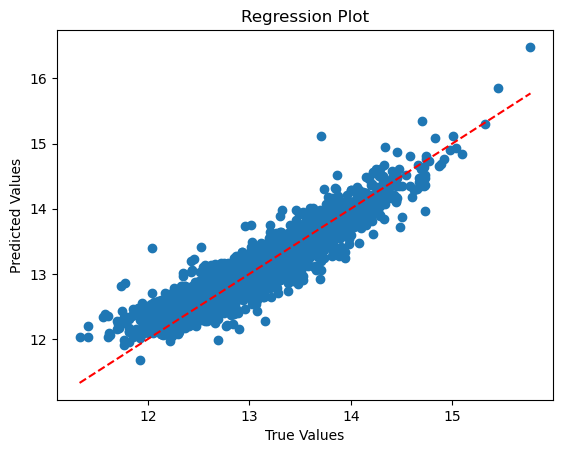

In [66]:
## Regression Plot
plt.scatter(Y_test_scal, y_pred)
plt.plot([np.min(Y_test_scal), np.max(Y_test_scal)], [np.min(Y_test_scal), np.max(Y_test_scal)], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot')
plt.show()

In [67]:
data_importance = pd.Series([abs(i) for i in reg.coef_], index=X_train.columns).sort_values(ascending=False)
data_importance

zipcode_98039    1.081521
zipcode_98004    0.956661
zipcode_98112    0.823361
zipcode_98040    0.770149
zipcode_98109    0.729583
                   ...   
zipcode_98003    0.002875
floors_1.5       0.002793
grade_8          0.001091
sqft_living      0.000160
sqft_above       0.000086
Length: 102, dtype: float64

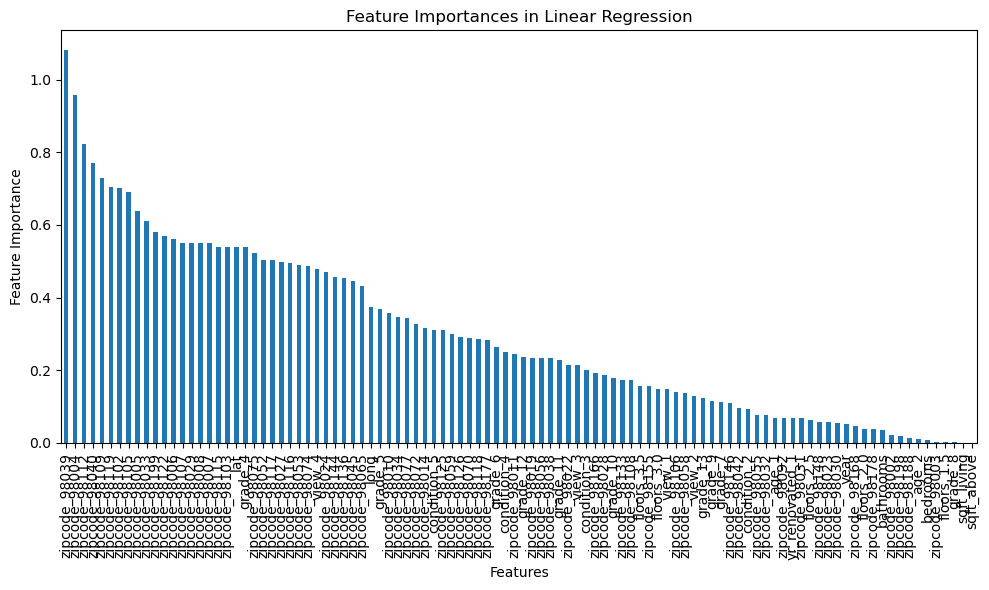

In [68]:
plt.figure(figsize=(10, 6))


data_importance.plot(kind='bar')

plt.xlabel('Features') 
plt.ylabel('Feature Importance') 
plt.title('Feature Importances in Linear Regression')  
plt.xticks(rotation=90)  


plt.tight_layout()  
plt.show()


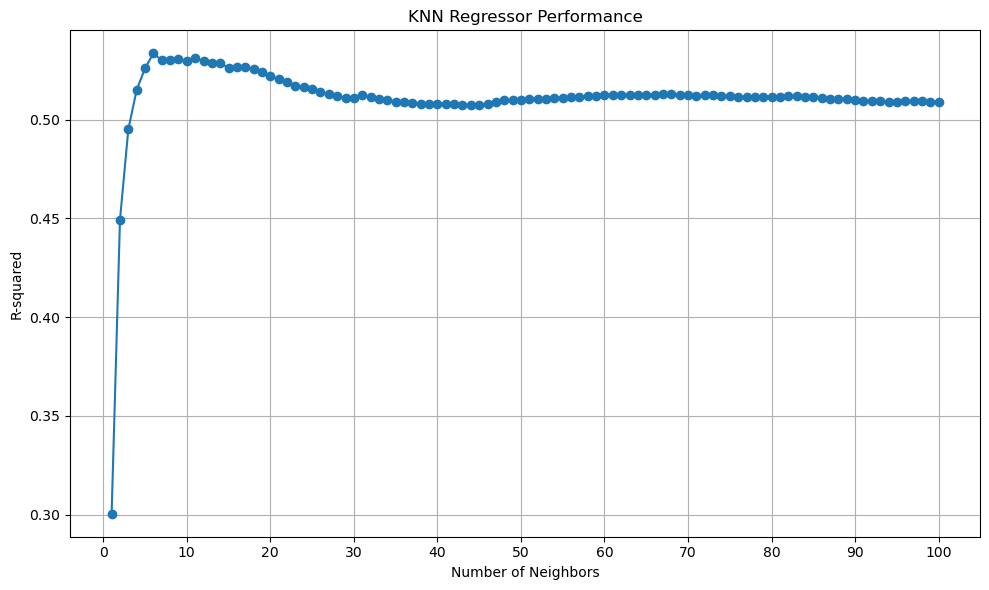

In [69]:
## Trying out KNN Regressor

## Step 1: Split the data into features (X) and target variable (y)
x=df_3_concat.drop('price',axis=1)
y=df_3_concat['price']

## Step 2: Split the data into training and testing sets
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Step 3: Log scaling
Y_train_scal = np.log1p(Y_train)
Y_test_scal = np.log1p(Y_test)

## Step 4 and 5: Train the KNN Regressor with varying numbers of neighbors and evaluate performance
neighbors_range = range(1, 101)
r_squared_values = []

for n_neighbors in neighbors_range:
    knn_regressor = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_regressor.fit(X_train, Y_train_scal)
    y_pred = knn_regressor.predict(X_test)
    r_squared = r2_score(Y_test_scal, y_pred)
    r_squared_values.append(r_squared)

## Step 5: Plot the R-squared values against the number of neighbors
plt.figure(figsize=(10, 6)) 
plt.plot(neighbors_range, r_squared_values, marker='o')
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared')
plt.title('KNN Regressor Performance')
plt.xticks(np.arange(0, 101, 10)) 
plt.grid(True)
plt.tight_layout()
plt.show()
